#IMPORTING THE FINANCIAL DATA FOR 2021-2023

In [1]:
#installing yahoo finance library
!pip install yfinance

##Downloading stock prices

In [2]:
import yfinance as yf
import pandas as pd

# Define the top 5 Fortune 500 companies tickers
tickers = ['WMT', 'AMZN', 'AAPL', 'CVS', 'UNH']

# Download historical stock prices from 2021-2023
data = yf.download(tickers, start='2021-01-01', end='2023-12-31')

# Save to CSV (optional)
data.to_csv('fortune_500_stocks.csv')


[*********************100%%**********************]  5 of 5 completed


##DATA Preprocessing

In [3]:
#reading the saved csv from above into dataframe
data = pd.read_csv('fortune_500_stocks.csv', header=[0,1], index_col=0, parse_dates=True)


In [4]:
data.head()

Price        Adj Close                                                \
Ticker            AAPL        AMZN        CVS         UNH        WMT   
Date                                                                   
2021-01-04  126.830063  159.331497  63.468384  332.521729  46.305019   
2021-01-05  128.398178  160.925507  63.894600  328.049957  46.058529   
2021-01-06  124.076073  156.919006  65.798897  341.817047  46.346104   
2021-01-07  128.309937  158.108002  67.095665  347.297241  46.342941   
2021-01-08  129.417465  159.134995  67.884605  345.736908  46.336617   

Price            Close                                                ...  \
Ticker            AAPL        AMZN        CVS         UNH        WMT  ...   
Date                                                                  ...   
2021-01-04  129.410004  159.331497  69.989998  349.500000  48.843334  ...   
2021-01-05  131.009995  160.925507  70.459999  344.799988  48.583332  ...   
2021-01-06  126.599998  156.919006  72.559998  359.269989  48.886665  ...   
2021-01-07  130.919998  158.108002  73.989998  365.029999  48.883331  ...   
2021-01-08  132.050003  159.134995  74.860001  363.390015  48.876667  ...   

Price             Open                                                \
Ticker            AAPL        AMZN        CVS         UNH        WMT   
Date                                                                   
2021-01-04  133.520004  163.500000  68.680000  351.450012  48.099998   
2021-01-05  128.889999  158.300507  70.330002  348.690002  48.866669   
2021-01-06  127.720001  157.324005  70.000000  337.109985  48.363335   
2021-01-07  128.360001  157.850006  73.050003  358.540009  49.206669   
2021-01-08  132.429993  159.000000  75.000000  367.000000  48.959999   

Price          Volume                                         
Ticker           AAPL      AMZN       CVS      UNH       WMT  
Date                                                          
2021-01-04  143301900  88228000  11367200  4203800  32182200  
2021-01-05   97664900  53110000   8012200  3160500  26498100  
2021-01-06  155088000  87896000  10142400  6561400  21918900  
2021-01-07  109578200  70290000   7962300  3366700  20538000  
2021-01-08  105158200  70754000  11254700  2947800  24478200  

[5 rows x 30 columns]

In [5]:
#Checking for null values
data.isnull().sum()

Price      Ticker
Adj Close  AAPL      0
           AMZN      0
           CVS       0
           UNH       0
           WMT       0
Close      AAPL      0
           AMZN      0
           CVS       0
           UNH       0
           WMT       0
High       AAPL      0
           AMZN      0
           CVS       0
           UNH       0
           WMT       0
Low        AAPL      0
           AMZN      0
           CVS       0
           UNH       0
           WMT       0
Open       AAPL      0
           AMZN      0
           CVS       0
           UNH       0
           WMT       0
Volume     AAPL      0
           AMZN      0
           CVS       0
           UNH       0
           WMT       0
dtype: int64

##Plotting the time series plot

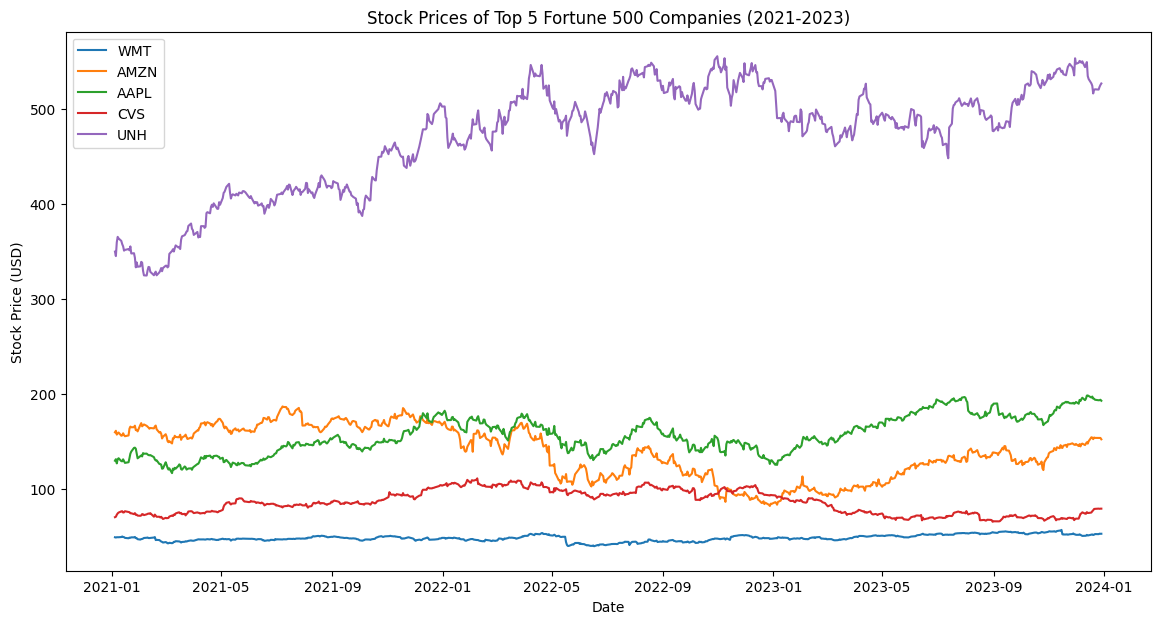

In [6]:
import matplotlib.pyplot as plt

# Plot closing prices for each company
plt.figure(figsize=(14, 7))
for ticker in ['WMT', 'AMZN', 'AAPL', 'CVS', 'UNH']:
    plt.plot(data.index, data[('Close', ticker)], label=ticker)

plt.title('Stock Prices of Top 5 Fortune 500 Companies (2021-2023)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()


#STATISTICAL MODELLING

##IMPORTS

In [7]:
from statsmodels.tsa.stattools import adfuller

##AUGMENTED DICKY-FULLER TEST for STATIONARITY

In [10]:
#Performing ADF TEST for stationarity check
def adf_test(series, company_name):
    print(f'ADF Test for {company_name}')
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Values {key}: {value}')
    print('\n')

# Perform ADF test for each company's closing prices in the entire dataset
for ticker in ['WMT', 'AMZN', 'AAPL', 'CVS', 'UNH']:
    adf_test(data[('Close', ticker)], ticker)

ADF Test for WMT
ADF Statistic: -2.472814329685776
p-value: 0.12222977297596016
Critical Values 1%: -3.4390874066174355
Critical Values 5%: -2.8653962034740705
Critical Values 10%: -2.568823449196012


ADF Test for AMZN
ADF Statistic: -1.5906926516962865
p-value: 0.4882672134800796
Critical Values 1%: -3.439075747702915
Critical Values 5%: -2.8653910653234655
Critical Values 10%: -2.568820711931304


ADF Test for AAPL
ADF Statistic: -1.6252496584517007
p-value: 0.46997819425428744
Critical Values 1%: -3.439075747702915
Critical Values 5%: -2.8653910653234655
Critical Values 10%: -2.568820711931304


ADF Test for CVS
ADF Statistic: -1.6722967715289845
p-value: 0.4454395481796165
Critical Values 1%: -3.439075747702915
Critical Values 5%: -2.8653910653234655
Critical Values 10%: -2.568820711931304


ADF Test for UNH
ADF Statistic: -2.1257392677495712
p-value: 0.2342914414925883
Critical Values 1%: -3.439075747702915
Critical Values 5%: -2.8653910653234655
Critical Values 10%: -2.568820711

##DIFFERENCING THE DATA

In [11]:
# Difference the series
differenced_series = {}
for ticker in ['WMT', 'AMZN', 'AAPL', 'CVS', 'UNH']:
    series = data[('Close', ticker)]
    differenced_series[ticker] = series.diff().dropna()

    # Perform ADF test on differenced series
    adf_test(differenced_series[ticker], f'{ticker} (differenced)')


ADF Test for WMT (differenced)
ADF Statistic: -25.9176041122098
p-value: 0.0
Critical Values 1%: -3.4390874066174355
Critical Values 5%: -2.8653962034740705
Critical Values 10%: -2.568823449196012


ADF Test for AMZN (differenced)
ADF Statistic: -27.54775881631213
p-value: 0.0
Critical Values 1%: -3.4390874066174355
Critical Values 5%: -2.8653962034740705
Critical Values 10%: -2.568823449196012


ADF Test for AAPL (differenced)
ADF Statistic: -20.44107308468626
p-value: 0.0
Critical Values 1%: -3.439099096730074
Critical Values 5%: -2.8654013553540745
Critical Values 10%: -2.568826193777778


ADF Test for CVS (differenced)
ADF Statistic: -28.306304341342933
p-value: 0.0
Critical Values 1%: -3.4390874066174355
Critical Values 5%: -2.8653962034740705
Critical Values 10%: -2.568823449196012


ADF Test for UNH (differenced)
ADF Statistic: -28.292860732117454
p-value: 0.0
Critical Values 1%: -3.4390874066174355
Critical Values 5%: -2.8653962034740705
Critical Values 10%: -2.568823449196012


##ACF-PACF PLOT

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import numpy as np

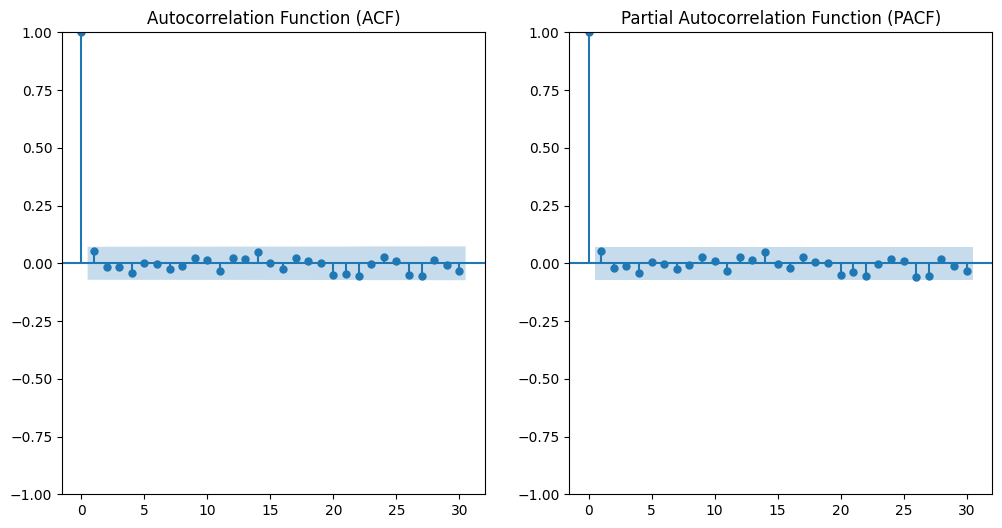

Suggested p (AR order): 1
Suggested q (MA order): 1


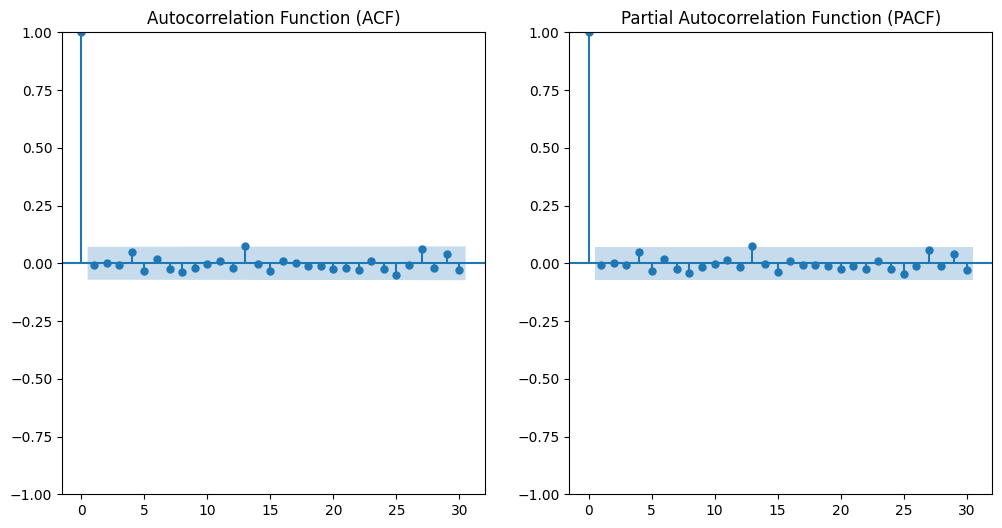

Suggested p (AR order): 1
Suggested q (MA order): 1


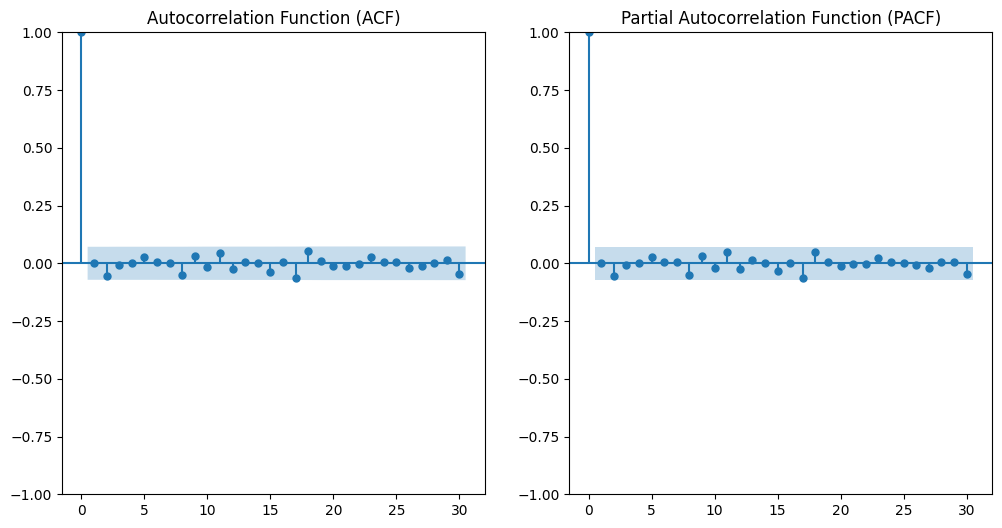

Suggested p (AR order): 1
Suggested q (MA order): 1


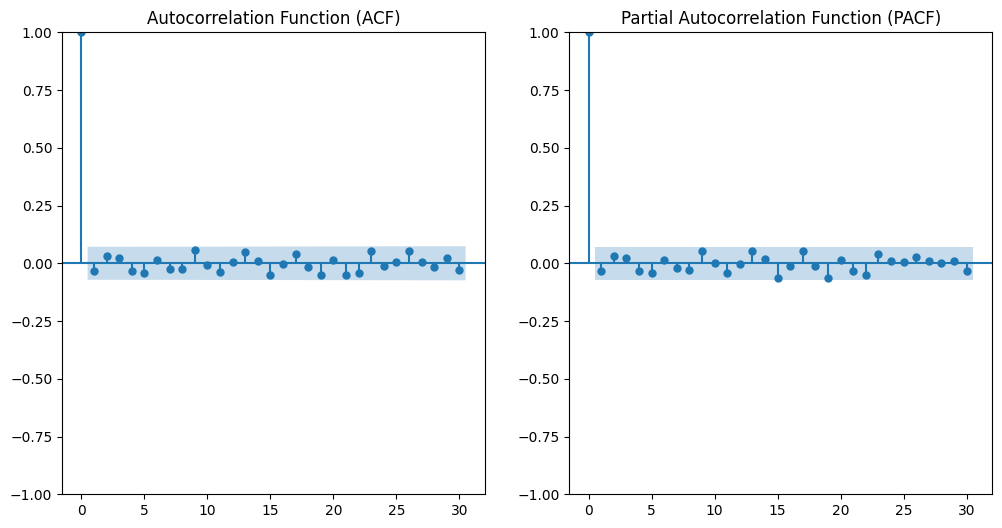

Suggested p (AR order): 1
Suggested q (MA order): 1


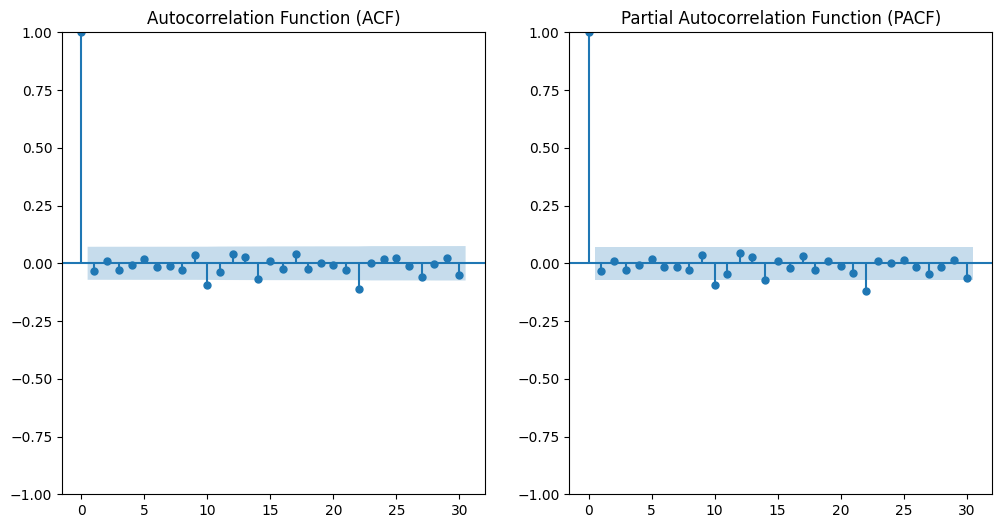

Suggested p (AR order): 1
Suggested q (MA order): 1


In [20]:
def plot_acf_pacf(series, lags=30):
    """Plot ACF and PACF and print suggested p and q values."""
    plt.figure(figsize=(12, 6))

    # Calculate ACF and PACF values
    acf_values = acf(series, nlags=lags, fft=True)
    pacf_values = pacf(series, nlags=lags)

    # Plot ACF
    plt.subplot(121)
    plot_acf(series, lags=lags, ax=plt.gca(), alpha=0.05)
    plt.title('Autocorrelation Function (ACF)')

    # Plot PACF
    plt.subplot(122)
    plot_pacf(series, lags=lags, ax=plt.gca(), alpha=0.05)
    plt.title('Partial Autocorrelation Function (PACF)')

    plt.show()

    # Determine threshold and cut-off points
    threshold = 0.2  # Common threshold value
    acf_cutoff = np.where(np.abs(acf_values) < threshold)[0]
    pacf_cutoff = np.where(np.abs(pacf_values) < threshold)[0]

    p = pacf_cutoff[0] if len(pacf_cutoff) > 0 else lags
    q = acf_cutoff[0] if len(acf_cutoff) > 0 else lags

    print(f'Suggested p (AR order): {p}')
    print(f'Suggested q (MA order): {q}')

# Apply the function to each ticker
for ticker in ['WMT', 'AMZN', 'AAPL', 'CVS', 'UNH']:
    series = differenced_series[ticker]
    plot_acf_pacf(series, lags=30)

##SPLITTING THE DIFFERENCED DATA

In [22]:
# Define the split points
train_end = '2022-12-31'  # End of training data
val_start = '2023-01-01'  # Start of validation data

# Initialize dictionaries for train and validation data
train_data = {}
val_data = {}

# Split data for each stock
for ticker, series in differenced_series.items():
    # Convert series to DataFrame if it is not already
    if not isinstance(series, pd.DataFrame):
        series = series.to_frame(name=ticker)

    # Split the data
    train_data[ticker] = series.loc[:train_end]
    val_data[ticker] = series.loc[val_start:]

# Convert dictionaries to DataFrames if needed
train_data_df = pd.concat(train_data.values(), axis=1)
val_data_df = pd.concat(val_data.values(), axis=1)

In [23]:
train_data_df.head(3)

,WMT,AMZN,AAPL,CVS,UNH
Date,,,,,
2021-01-05,-0.260002,1.594009,1.599991,0.470001,-4.700012
2021-01-06,0.303333,-4.006500,-4.409996,2.099998,14.470001
2021-01-07,-0.003334,1.188995,4.320000,1.430000,5.760010


In [39]:
val_data_df.tail(1)

,WMT,AMZN,AAPL,CVS,UNH
Date,,,,,
2023-12-29,0.026665,-1.440002,-1.050003,-0.010002,1.569946


##MODEL TRAINING AND VALIDATION

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [42]:
# Ensure proper frequency for date indices based on actual data length
train_data_len = len(train_data_df)
val_data_len = len(val_data_df)

In [43]:
print(len(train_data_df))

725


In [44]:
print(len(val_data_df))

361


In [46]:
train_start_date = pd.to_datetime('2021-01-05')
val_start_date = pd.to_datetime('2023-01-03')

train_data_df.index = pd.date_range(start=train_start_date, periods=train_data_len, freq='B')
val_data_df.index = pd.date_range(start=val_start_date, periods=val_data_len, freq='B')

# Dictionaries to store the results
forecast_results = {}
validation_scores = {}

# Fit ARIMA model and validate
for ticker in train_data_df.columns:
    print(f"Processing {ticker}...")

    # Extract train and validation series
    train_series = train_data_df[ticker]
    val_series = val_data_df[ticker]

    # Fit ARIMA model
    model = ARIMA(train_series, order=(1, 1, 1))
    model_fit = model.fit()

    # Make predictions
    forecast = model_fit.get_forecast(steps=len(val_series))
    forecast_values = forecast.predicted_mean

    # Store forecast results
    forecast_results[ticker] = forecast_values

    # Calculate validation scores
    mse = mean_squared_error(val_series, forecast_values)
    mae = mean_absolute_error(val_series, forecast_values)
    rmse = np.sqrt(mse)

    validation_scores[ticker] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse}

    print(f"{ticker} - MSE: {mse}, MAE: {mae}, RMSE: {rmse}")

# Print validation scores
for ticker, scores in validation_scores.items():
    print(f"{ticker} - MSE: {scores['MSE']}, MAE: {scores['MAE']}, RMSE: {scores['RMSE']}")

Processing WMT...
WMT - MSE: 0.2640800493631959, MAE: 0.38132623574057256, RMSE: 0.5138871951734115
Processing AMZN...
AMZN - MSE: 7.220652236932232, MAE: 1.964467775237685, RMSE: 2.687127134493683
Processing AAPL...
AAPL - MSE: 5.135332680898807, MAE: 1.7037889035009288, RMSE: 2.2661272428746817
Processing CVS...
CVS - MSE: 1.07184198787438, MAE: 0.7540117468635281, RMSE: 1.0352980188691467
Processing UNH...
UNH - MSE: 44.20764865727089, MAE: 4.696150081191745, RMSE: 6.648883263922663
WMT - MSE: 0.2640800493631959, MAE: 0.38132623574057256, RMSE: 0.5138871951734115
AMZN - MSE: 7.220652236932232, MAE: 1.964467775237685, RMSE: 2.687127134493683
AAPL - MSE: 5.135332680898807, MAE: 1.7037889035009288, RMSE: 2.2661272428746817
CVS - MSE: 1.07184198787438, MAE: 0.7540117468635281, RMSE: 1.0352980188691467
UNH - MSE: 44.20764865727089, MAE: 4.696150081191745, RMSE: 6.648883263922663


##FORECASTING

In [63]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
# Define the forecast period (6 months of trading days, assuming 21 trading days per month)
forecast_period = 6 * 21  # Approximate number of trading days in 6 months

# Dictionary to store the forecast results
forecast_results = {}

for ticker in differenced_series.keys():
    print(f"Forecasting for {ticker}...")

    # Extract the differenced series
    diff_series = differenced_series[ticker]

    # Fit ARIMA model on the differenced series
    model = ARIMA(diff_series, order=(1, 1, 1))
    model_fit = model.fit()

    # Make forecast for the first six months of 2024
    forecast = model_fit.get_forecast(steps=forecast_period)
    forecast_values = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    # Store forecast results
    forecast_results[ticker] = forecast_values
    # Print forecast results for the first six months of 2024
for ticker, forecast in forecast_results.items():
    print(f"{ticker} - Forecast for first six months of 2024:")
    print(forecast)

# Save the forecast results to a file or variable for later comparison
forecast_results_df = pd.DataFrame(forecast_results)
forecast_results_df.to_csv('arima_forecast_2024.csv')  # Save to CSV file

Forecasting for WMT...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecasting for AMZN...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecasting for AAPL...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecasting for CVS...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecasting for UNH...
WMT - Forecast for first six months of 2024:
752    0.006126
753    0.004979
754    0.004914
755    0.004911
756    0.004911
         ...   
873    0.004911
874    0.004911
875    0.004911
876    0.004911
877    0.004911
Name: predicted_mean, Length: 126, dtype: float64
AMZN - Forecast for first six months of 2024:
752   -0.002392
753   -0.009845
754   -0.009806
755   -0.009806
756   -0.009806
         ...   
873   -0.009806
874   -0.009806
875   -0.009806
876   -0.009806
877   -0.009806
Name: predicted_mean, Length: 126, dtype: float64
AAPL - Forecast for first six months of 2024:
752    0.080610
753    0.083929
754    0.083938
755    0.083938
756    0.083938
         ...   
873    0.083938
874    0.083938
875    0.083938
876    0.083938
877    0.083938
Name: predicted_mean, Length: 126, dtype: float64
CVS - Forecast for first six months of 2024:
752   -0.001047
753   -0.001350
754   -0.001340
755   -0.001340
756   -0.001340
         ...   
873   -0.001340
874  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


##PLOT using SEABORN

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# Convert the differenced forecast back to the original scale
integrated_forecast_results = {}

for ticker in forecast_results.keys():
    print(f"Integrating forecast for {ticker}...")

    # Get the original series and the forecasted differenced values
    original_series = data[('Close', ticker)]
    last_observed = original_series.iloc[-1]

    # Forecasted differenced values
    forecast_diff = forecast_results[ticker]

    # Integrate the differenced forecast back to the original scale
    integrated_forecast = forecast_diff.cumsum() + last_observed

    # Store the integrated forecast
    integrated_forecast_results[ticker] = integrated_forecast

# Convert the integrated forecast results to a DataFrame
integrated_forecast_df = pd.DataFrame(integrated_forecast_results)

Integrating forecast for WMT...
Integrating forecast for AMZN...
Integrating forecast for AAPL...
Integrating forecast for CVS...
Integrating forecast for UNH...


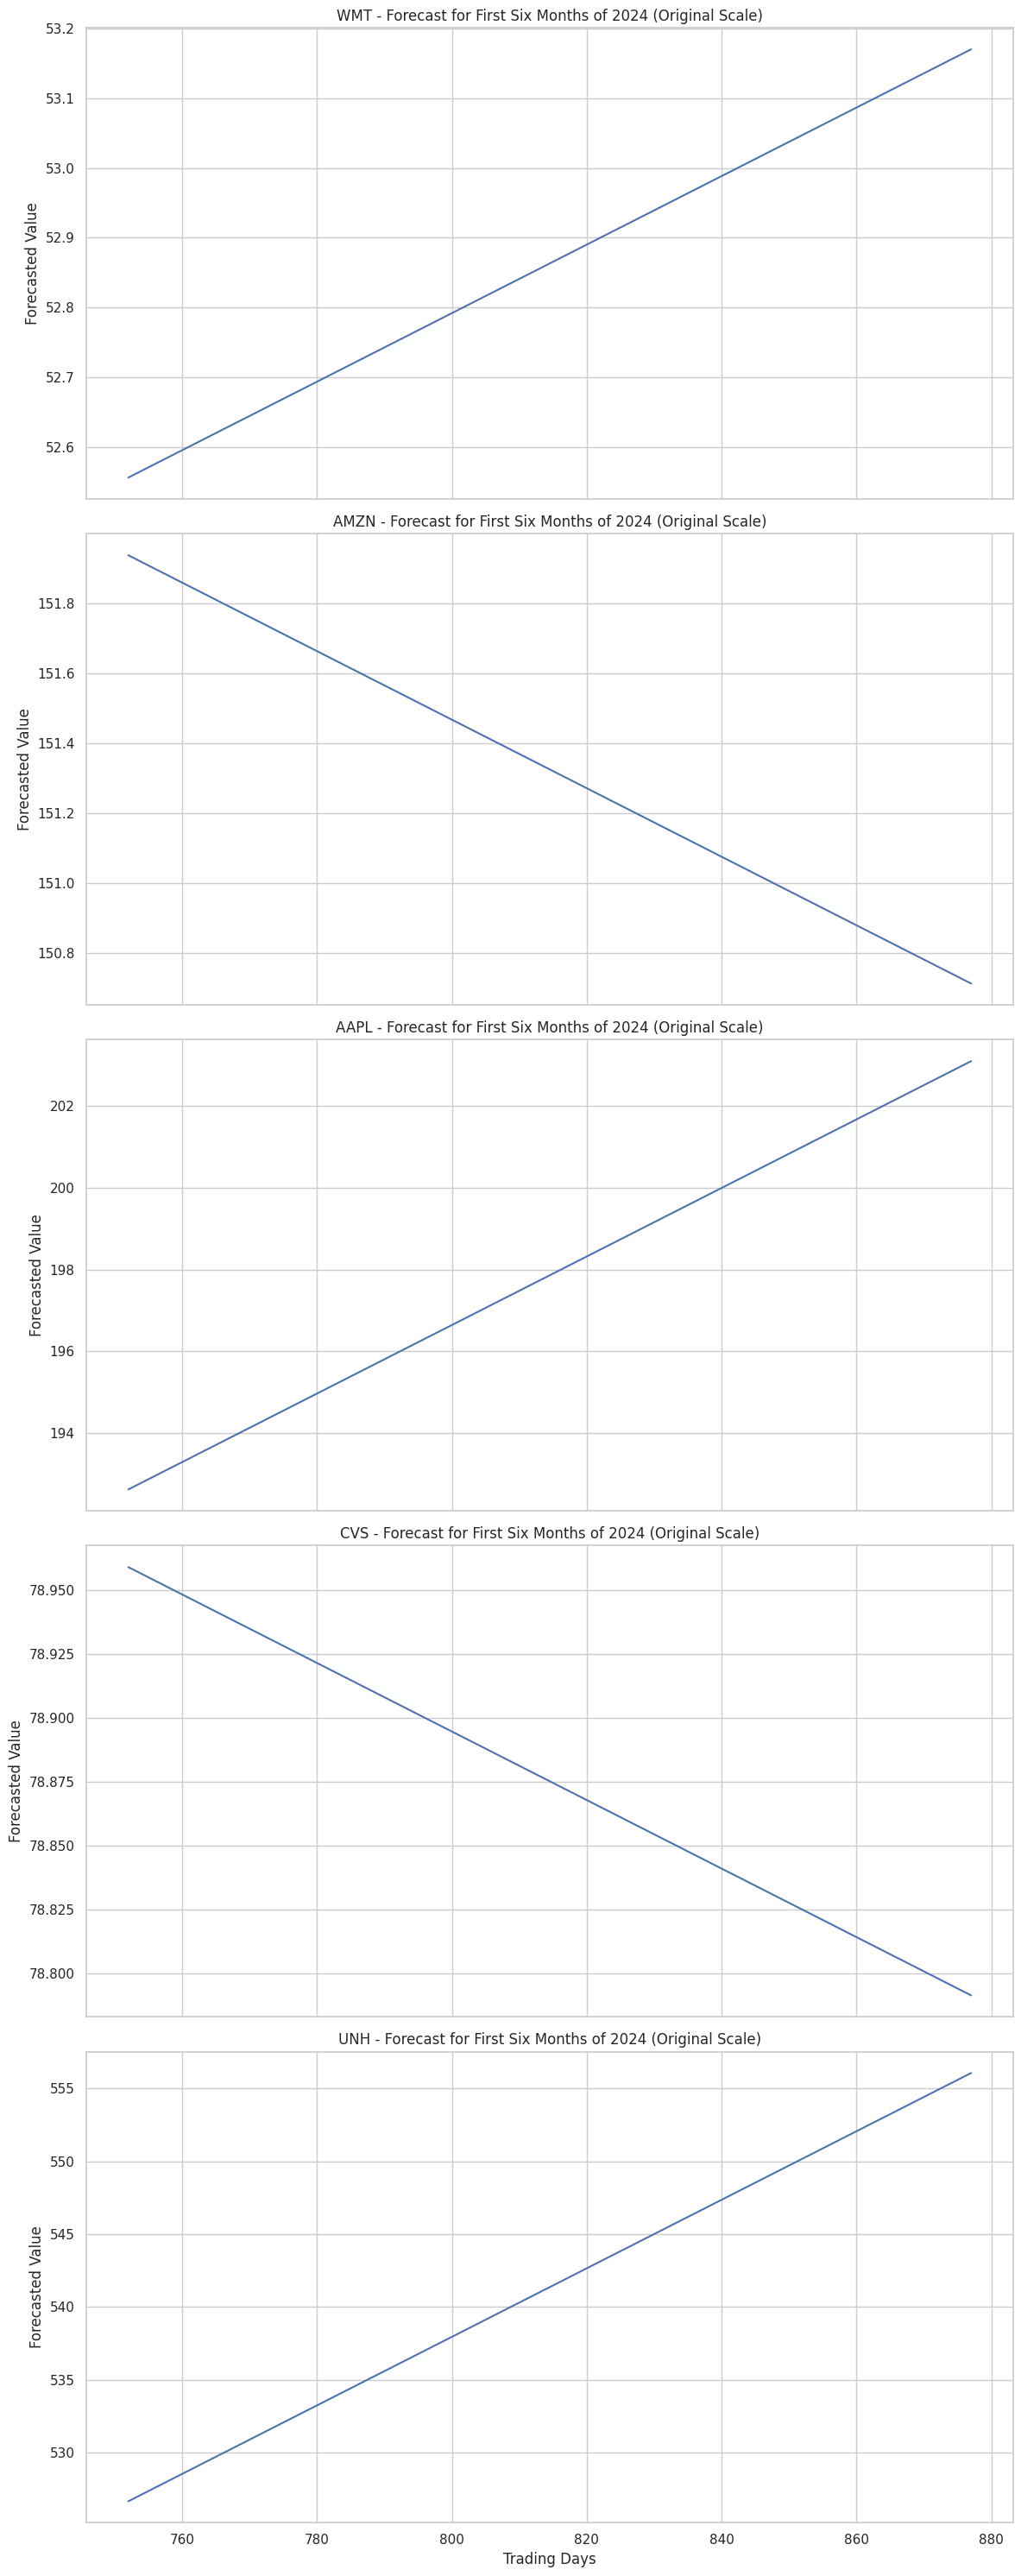

In [67]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure with subplots for each ticker
num_tickers = len(integrated_forecast_df.columns)
fig, axes = plt.subplots(num_tickers, 1, figsize=(12, 6 * num_tickers), sharex=True)

# Iterate through each ticker and create a line plot
for i, ticker in enumerate(integrated_forecast_df.columns):
    sns.lineplot(data=integrated_forecast_df[ticker], ax=axes[i])
    axes[i].set_title(f'{ticker} - Forecast for First Six Months of 2024 (Original Scale)')
    axes[i].set_ylabel('Forecasted Value')

# Set a common x-axis label
axes[-1].set_xlabel('Trading Days')

# Adjust the layout
plt.tight_layout()
plt.show()

In [68]:
# Save the integrated forecast results to a CSV file
integrated_forecast_df.to_csv('integrated_forecast_2024.csv')


#MACHINE LEARNING MODELLING

##IMPORTS

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

##Feature Selection

In [85]:
# Define the tickers
tickers = ['WMT', 'AMZN', 'AAPL', 'CVS', 'UNH']

# Read the saved CSV file into a dataframe
data = pd.read_csv('fortune_500_stocks.csv', header=[0, 1], index_col=0, parse_dates=True)

# Extract closing prices and create a dataframe with the closing prices and datetime features
closing_prices = data['Close']
closing_prices = closing_prices.dropna()

# Create features and labels
def create_features(df):
    df['Day'] = df.index.day
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['DayOfWeek'] = df.index.dayofweek
    return df

features = closing_prices.copy()
features = create_features(features)

# Split the data into training (2021-2022) and validation (2023) sets
train_features = features.loc['2021-01-01':'2022-12-31']
validation_features = features.loc['2023-01-01':'2023-12-31']
train_labels = closing_prices.loc['2021-01-01':'2022-12-31']
validation_labels = closing_prices.loc['2023-01-01':'2023-12-31']

##MODEL TRAINING AND VALIDATION

In [86]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(train_features.drop(columns=tickers), train_labels)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train_features.drop(columns=tickers), train_labels)

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(train_features.drop(columns=tickers), train_labels)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [87]:
# Function to calculate MAE, MSE, and RMSE
def calculate_metrics(true_values, predictions):
    mae = mean_absolute_error(true_values, predictions)
    mse = mean_squared_error(true_values, predictions)
    rmse = np.sqrt(mse)
    return mae, mse, rmse
# Validate Linear Regression model
lr_predictions = lr_model.predict(validation_features.drop(columns=tickers))
lr_mae, lr_mse, lr_rmse = calculate_metrics(validation_labels, lr_predictions)
#print(f'Linear Regression MAE: {lr_mae}')
#print(f'Linear Regression MSE: {lr_mse}')
#print(f'Linear Regression RMSE: {lr_rmse}')

# Validate Random Forest model
rf_predictions = rf_model.predict(validation_features.drop(columns=tickers))
rf_mae, rf_mse, rf_rmse = calculate_metrics(validation_labels, rf_predictions)
#print(f'Random Forest MAE: {rf_mae}')
#print(f'Random Forest MSE: {rf_mse}')
#print(f'Random Forest RMSE: {rf_rmse}')

# Validate XGBoost model
xgb_predictions = xgb_model.predict(validation_features.drop(columns=tickers))
xgb_mae, xgb_mse, xgb_rmse = calculate_metrics(validation_labels, xgb_predictions)
#print(f'XGBoost MAE: {xgb_mae}')
#print(f'XGBoost MSE: {xgb_mse}')
#print(f'XGBoost RMSE: {xgb_rmse}')

##BEST MODEL BASED ON VALIDATION

In [88]:
# Define a dictionary to store the metrics for each model
model_metrics = {
    'Linear Regression': {
        'MAE': lr_mae,
        'MSE': lr_mse,
        'RMSE': lr_rmse
    },
    'Random Forest': {
        'MAE': rf_mae,
        'MSE': rf_mse,
        'RMSE': rf_rmse
    },
    'XGBoost': {
        'MAE': xgb_mae,
        'MSE': xgb_mse,
        'RMSE': xgb_rmse
    }
}

# Function to print the metrics and select the best model
def print_and_select_best_model(metrics):
    best_model = None
    best_mae = float('inf')
    best_mse = float('inf')
    best_rmse = float('inf')

    print("Model Evaluation Metrics:")
    for model_name, metrics_dict in metrics.items():
        print(f"{model_name}:")
        print(f"  MAE: {metrics_dict['MAE']}")
        print(f"  MSE: {metrics_dict['MSE']}")
        print(f"  RMSE: {metrics_dict['RMSE']}")

        if metrics_dict['MAE'] < best_mae:
            best_mae = metrics_dict['MAE']
            best_model = model_name

        if metrics_dict['MSE'] < best_mse:
            best_mse = metrics_dict['MSE']
            best_model = model_name

        if metrics_dict['RMSE'] < best_rmse:
            best_rmse = metrics_dict['RMSE']
            best_model = model_name

    print(f"\nBest Model based on MAE: {best_model} (MAE: {best_mae})")
    print(f"Best Model based on MSE: {best_model} (MSE: {best_mse})")
    print(f"Best Model based on RMSE: {best_model} (RMSE: {best_rmse})")

# Print and select the best model
print_and_select_best_model(model_metrics)

Model Evaluation Metrics:
Linear Regression:
  MAE: 43.27182458739516
  MSE: 3683.3038497578855
  RMSE: 60.69022861843482
Random Forest:
  MAE: 22.540409662414543
  MSE: 813.8039251171042
  RMSE: 28.52724881787769
XGBoost:
  MAE: 22.55977539978027
  MSE: 815.3928027147562
  RMSE: 28.5550836579891

Best Model based on MAE: Random Forest (MAE: 22.540409662414543)
Best Model based on MSE: Random Forest (MSE: 813.8039251171042)
Best Model based on RMSE: Random Forest (RMSE: 28.52724881787769)


##FORECAST USING RANDOM FOREST REGRESSOR

In [111]:
# Train Random Forest model for each ticker
rf_models = {}
for ticker in tickers:
    # Prepare training data for the specific ticker
    ticker_train_features = train_features.drop(columns=tickers, errors='ignore')
    ticker_train_labels = train_labels[ticker]

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(ticker_train_features, ticker_train_labels)

    rf_models[ticker] = rf_model

In [112]:
# Create forecast features for the first 6 months of 2024
def create_forecast_features(start_date, end_date):
    forecast_dates = pd.date_range(start=start_date, end=end_date)
    forecast_features = pd.DataFrame(index=forecast_dates)
    forecast_features = create_features(forecast_features)  # Use the same feature creation function
    return forecast_features


In [113]:
forecast_features_2024 = create_forecast_features('2024-01-01', '2024-06-30')


In [114]:
# Ensure the forecast features have the same columns as the training features
forecast_features_2024_flat = forecast_features_2024[train_features.drop(columns=tickers, errors='ignore').columns]

# Initialize a DataFrame to store the forecast results with tickers
forecast_results_2024 = pd.DataFrame(index=forecast_features_2024.index)

In [115]:
# Make predictions for each ticker
for ticker in tickers:
    # Prepare data for prediction
    forecast_features_for_ticker = forecast_features_2024_flat.copy()

    # Make predictions using the Random Forest model
    forecast_results_2024[ticker] = rf_models[ticker].predict(forecast_features_for_ticker)


In [116]:
# Reshape forecast results to include ticker information
forecast_results_2024 = forecast_results_2024.stack().reset_index()
forecast_results_2024.columns = ['Date', 'Ticker', 'Forecast']


In [117]:
# Save the forecast results to a CSV file
forecast_results_2024.to_csv('random_forest_forecast_2024_with_tickers.csv', index=False)

print("Forecast for 2024 with tickers has been saved to 'random_forest_forecast_2024_with_tickers.csv'.")

Forecast for 2024 with tickers has been saved to 'random_forest_forecast_2024_with_tickers.csv'.


#WHO's THE WINNER?

##ACTUAL STOCK DATA

In [118]:
# Define the stock tickers and the date range
tickers = ['WMT', 'AMZN', 'AAPL', 'CVS', 'UNH']
start_date = '2024-01-01'
end_date = '2024-06-30'

# Download the stock data
actual_data = yf.download(tickers, start=start_date, end=end_date)['Close']
actual_data.to_csv('actual_stock_data_2024.csv')

[*********************100%%**********************]  5 of 5 completed


In [158]:
#IMPORTING ALL 3 FILES
# Load the actual stock data
actual_data = pd.read_csv('/content/actual_stock_data_2024.csv', index_col=0, parse_dates=True)
print(actual_data.head())

                  AAPL        AMZN        CVS         UNH        WMT
Date                                                                
2024-01-02  185.639999  149.929993  80.849998  539.340027  53.096668
2024-01-03  184.250000  148.470001  80.879997  542.030029  53.099998
2024-01-04  181.910004  144.570007  80.510002  545.419983  52.586666
2024-01-05  181.179993  145.240005  81.419998  537.380005  52.236668
2024-01-08  185.559998  149.100006  80.680000  536.520020  52.750000


In [164]:
# Print the date range and length of actual_data
print("Actual data date range:", actual_data.index.min(), "to", actual_data.index.max())
print("Actual data length:", len(actual_data))

# Create the date range based on actual data
actual_start_date = actual_data.index.min()
actual_end_date = actual_data.index.max()

Actual data date range: 2024-01-02 00:00:00 to 2024-06-28 00:00:00
Actual data length: 124


In [165]:
# Load the forecast data
arima_forecast = pd.read_csv('/content/integrated_forecast_2024.csv', index_col=0, parse_dates=True)
# Filter ARIMA forecast to only include dates within the actual data range
arima_forecast.index = pd.date_range(start=actual_start_date, periods=arima_forecast.shape[0], freq='B')
arima_forecast = arima_forecast.loc[actual_start_date:actual_end_date]
arima_forecast.columns = ['WMT', 'AMZN', 'AAPL', 'CVS', 'UNH']  # Assign column names

In [168]:
# Load the Random Forest forecast data and pivot to get the correct structure
rf_forecast_raw = pd.read_csv('/content/random_forest_forecast_2024_with_tickers.csv')
# Transform the rf_forecast_raw DataFrame
rf_forecast = rf_forecast_raw.pivot(index='Date', columns='Ticker', values='Forecast')
rf_forecast.index = pd.to_datetime(rf_forecast.index)
rf_forecast = rf_forecast.loc[actual_start_date:actual_end_date]


In [169]:
rf_forecast.head()

Ticker,AAPL,AMZN,CVS,UNH,WMT
Date,,,,,
2024-01-02,177.343598,163.926364,104.895401,482.336699,47.632966
2024-01-03,176.932696,162.041165,105.468001,491.237898,47.675766
2024-01-04,173.461398,163.923455,104.932499,485.500496,47.794600
2024-01-05,173.084899,162.423284,105.017199,476.646503,48.003966
2024-01-06,172.469899,162.085599,104.006699,467.148602,48.054366


In [170]:
# Ensure the indices are datetime
actual_data.index = pd.to_datetime(actual_data.index)
arima_forecast.index = pd.to_datetime(arima_forecast.index)
rf_forecast.index = pd.to_datetime(rf_forecast.index)


In [171]:
# Print the date ranges for debugging
print("Actual data date range:", actual_data.index.min(), "to", actual_data.index.max())
print("ARIMA forecast date range:", arima_forecast.index.min(), "to", arima_forecast.index.max())
print("Random Forest forecast date range:", rf_forecast.index.min(), "to", rf_forecast.index.max())

# Check the column names in each dataframe
print("Actual data columns:", actual_data.columns)
print("ARIMA forecast columns:", arima_forecast.columns)
print("Random Forest forecast columns:", rf_forecast.columns)

Actual data date range: 2024-01-02 00:00:00 to 2024-06-28 00:00:00
ARIMA forecast date range: 2024-01-02 00:00:00 to 2024-06-25 00:00:00
Random Forest forecast date range: 2024-01-02 00:00:00 to 2024-06-28 00:00:00
Actual data columns: Index(['AAPL', 'AMZN', 'CVS', 'UNH', 'WMT'], dtype='object')
ARIMA forecast columns: Index(['WMT', 'AMZN', 'AAPL', 'CVS', 'UNH'], dtype='object')
Random Forest forecast columns: Index(['AAPL', 'AMZN', 'CVS', 'UNH', 'WMT'], dtype='object', name='Ticker')


In [172]:
# Find the common dates between the actual data and forecasts
common_dates = actual_data.index.intersection(arima_forecast.index).intersection(rf_forecast.index)

# Filter the data to include only the common dates
actual_data = actual_data.loc[common_dates]
arima_forecast = arima_forecast.loc[common_dates]
rf_forecast = rf_forecast.loc[common_dates]
# Print the shapes of the filtered dataframes for debugging
print("Filtered actual_data shape:", actual_data.shape)
print("Filtered arima_forecast shape:", arima_forecast.shape)
print("Filtered rf_forecast shape:", rf_forecast.shape)

Filtered actual_data shape: (121, 5)
Filtered arima_forecast shape: (121, 5)
Filtered rf_forecast shape: (121, 5)


In [173]:
# Initialize a DataFrame to store the comparison results
comparison_df = actual_data.copy()

# Merge actual data with forecasts
for ticker in actual_data.columns:
    if ticker in arima_forecast.columns and ticker in rf_forecast.columns:
        comparison_df[f'ARIMA_{ticker}'] = arima_forecast[ticker]
        comparison_df[f'RF_{ticker}'] = rf_forecast[ticker]
    else:
        print(f"Ticker {ticker} is missing in forecast data.")

In [174]:
comparison_df.head()

,AAPL,AMZN,CVS,UNH,WMT,ARIMA_AAPL,RF_AAPL,ARIMA_AMZN,RF_AMZN,ARIMA_CVS,RF_CVS,ARIMA_UNH,RF_UNH,ARIMA_WMT,RF_WMT
2024-01-02,185.639999,149.929993,80.849998,539.340027,53.096668,192.610609,177.343598,151.937610,163.926364,78.958952,104.895401,526.663137,482.336699,52.556125,47.632966
2024-01-03,184.250000,148.470001,80.879997,542.030029,53.099998,192.694537,176.932696,151.927766,162.041165,78.957602,105.468001,526.899752,491.237898,52.561104,47.675766
2024-01-04,181.910004,144.570007,80.510002,545.419983,52.586666,192.778475,173.461398,151.917960,163.923455,78.956262,104.932499,527.134995,485.500496,52.566018,47.794600
2024-01-05,181.179993,145.240005,81.419998,537.380005,52.236668,192.862414,173.084899,151.908154,162.423284,78.954921,105.017199,527.370282,476.646503,52.570929,48.003966
2024-01-08,185.559998,149.100006,80.680000,536.520020,52.750000,192.946352,172.878602,151.898348,159.537991,78.953581,105.924800,527.605568,482.077102,52.575840,48.022834


In [175]:
# Drop rows where both ARIMA and Random Forest forecasts are NaN
comparison_df = comparison_df.dropna(subset=[col for col in comparison_df.columns if col.startswith('ARIMA_') or col.startswith('RF_')], how='all')

# Print the shape of comparison_df after dropping NaNs
print("Comparison DataFrame shape after dropping NaNs:", comparison_df.shape)

Comparison DataFrame shape after dropping NaNs: (121, 15)


In [176]:
# Check if there is any data left after dropping NaNs
if comparison_df.empty:
    print("No data left for comparison after dropping NaN values.")
else:
    # Calculate errors
    results = []
    for ticker in actual_data.columns:
        if f'ARIMA_{ticker}' in comparison_df.columns and f'RF_{ticker}' in comparison_df.columns:
            actual = comparison_df[ticker]
            arima_pred = comparison_df[f'ARIMA_{ticker}']
            rf_pred = comparison_df[f'RF_{ticker}']

            if actual.empty or arima_pred.empty or rf_pred.empty:
                print(f"No data left for {ticker} after dropping NaNs.")
                continue

            arima_mae = mean_absolute_error(actual, arima_pred)
            arima_mse = mean_squared_error(actual, arima_pred)
            arima_rmse = arima_mse ** 0.5

            rf_mae = mean_absolute_error(actual, rf_pred)
            rf_mse = mean_squared_error(actual, rf_pred)
            rf_rmse = rf_mse ** 0.5

            winner = 'ARIMA' if arima_mae < rf_mae else 'Random Forest'

            results.append({
                'Ticker': ticker,
                'ARIMA_MAE': arima_mae,
                'ARIMA_MSE': arima_mse,
                'ARIMA_RMSE': arima_rmse,
                'RF_MAE': rf_mae,
                'RF_MSE': rf_mse,
                'RF_RMSE': rf_rmse,
                'Winner': winner
            })

    # Convert results to DataFrame and print
    results_df = pd.DataFrame(results)
    print(results_df)


  Ticker  ARIMA_MAE    ARIMA_MSE  ARIMA_RMSE     RF_MAE       RF_MSE  \
0   AAPL  15.802595   337.796348   18.379237  23.313085  1002.328583   
1   AMZN  24.019728   694.921298   26.361360  36.275446  1960.291378   
2    CVS   9.500369   156.923674   12.526918  31.976222  1051.098915   
3    UNH  43.673338  2474.332889   49.742667  32.858785  1583.150540   
4    WMT   7.090932    66.077609    8.128814  13.147568   219.207334   

     RF_RMSE         Winner  
0  31.659573          ARIMA  
1  44.275178          ARIMA  
2  32.420656          ARIMA  
3  39.788824  Random Forest  
4  14.805652          ARIMA  


In [181]:
# Save the comparison results
comparison_df.to_csv('/content/comparison_with_forecasts_2024.csv')
results_df.to_csv('/content/model_comparison_results_2024.csv')

print("Comparison and model performance results have been saved.")

Comparison and model performance results have been saved.
